In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

,0
label,0
message,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df.drop_duplicates(inplace=True)

/tmp/ipython-input-7-3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


/tmp/ipython-input-9-2047579375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['message'].apply(len)


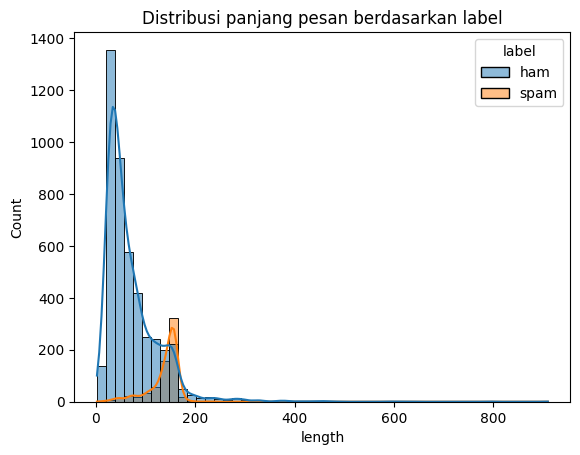

In [ ]:
df['length'] = df['message'].apply(len)
sns.histplot(data=df, x='length',hue='label',bins= 50, kde=True )
plt.title('Distribusi panjang pesan berdasarkan label')
plt.show()

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Buang tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Membuang angka
    text = re.sub(r'\d+', '', text)
    # Tokenisasi
    tokens = text.split()
    # Buang Stopwords dan apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [22]:
df['clean_message'] = df['message'].apply(preprocess_text)
df[['message', 'clean_message']].head()

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['clean_message'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Naive Buyes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_model= MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_nb= nb_model.predict(x_test)
print("Naive Bayes")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes
Akurasi: 0.9613152804642167
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

Confusion Matrix:
 [[889   0]
 [ 40 105]]


Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train,y_train)

y_pred_log = logreg_model.predict(x_test)
print("Logistic Regression")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression
Akurasi: 0.9468085106382979
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       889
           1       0.94      0.66      0.78       145

    accuracy                           0.95      1034
   macro avg       0.94      0.83      0.87      1034
weighted avg       0.95      0.95      0.94      1034

Confusion Matrix:
 [[883   6]
 [ 49  96]]


In [34]:
!pip install joblib

In [35]:
import joblib
joblib.dump(nb_model, 'naive_bayes_spam.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [36]:
loaded_model = joblib.load('naive_bayes_spam.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [44]:
new_text = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim.",
    "Don't forget our meeting tomorrow at 10AM.",
    "URGENT! Your account has been compromised. Reply with your login now.",
    "Hi mom, I’ll be home late tonight. Don’t wait up!",
    "Free entry to win a brand new iPhone. Limited time offer!",
    "Hey, can we reschedule our lunch to next week?",
    "Claim your free credit now before it expires!",
    "Good morning sir, attached is the monthly report you asked for.",]

cleaned = [preprocess_text(t)for t in new_text]
vec =  loaded_vectorizer.transform(cleaned)
pred = loaded_model.predict(vec)

label = le.inverse_transform(pred)
print("hasil prediksi :", label)

hasil prediksi : ['spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham']
